# Human/mouse protein sequence classification

This notebook serves for testing purposes of protein sequences classification.

Below you'll find exemplary initialization, training, loading and evaluation of 2 models which where chosen for this task:
1) Bidirectional LSTM
2) 'Shallow' CNN

The output is in range [0, 1], where 0 is the closest similarity to mouse and 1 is to human.

_P.S: since models use softmax activation in the output (which for K=2 is equivalent to sigmoid function) you can use them to for multiclass classification task._

_Important note: this example presents species classification for variable length data. In case of fixed length you can follow the same steps but at first you'll need to preprocess __flen__ data, and at second set __fixed_len__ and __gapped__ parameters to __True__ in models initialization_

## Data preparation

Data contains aproximately 500k observations for each of species - 1kk in total with 90/5/5 train/val/test sets split.

In [1]:
from utils_data import preprocess_classification_data
preprocess_classification_data(
    human_path = "./data/sample/vlen/human_vlen.txt",
    mouse_path = "./data/sample/vlen/mouse_vlen.txt",
    save_path = "./data/sample/vlen"
)
print('Data is ready.')

Data is ready.


## Initialization

In [2]:
from ablstm import ModelLSTM
from ablstm import ModelCNN

# initialize models
# change device to 'CUDA' if you wish to have a faster training
lstm_model = ModelLSTM(embedding_dim=64, hidden_dim=64, out_dim=2, gapped=False, fixed_len=False)
cnn_model = ModelCNN(embedding_dim=64, hidden_dim=64, out_dim=2, gapped=False, fixed_len=False)
print('Models initialized.')

Models initialized.


## Training

In [3]:
# data files
trn_fn = './data/sample/vlen/train_vlen.txt'
vld_fn = './data/sample/vlen/val_vlen.txt'

#### Models fit

It takes quite a long time to train __LSTM-Bi__ on variable length sequences, thus it's hardly recomended to load this model

For __CNN__ the training time is much better so you are welcome test that.

In [4]:
# fit lstm-bi model
# lstm_model.fit(trn_fn=trn_fn, vld_fn=vld_fn, n_epoch=1, trn_batch_size=128, vld_batch_size=512, lr=.002, save_fp=None)
# print('Done.')
# # fit cnn model
# cnn_model.fit(trn_fn=trn_fn, vld_fn=vld_fn, n_epoch=1, trn_batch_size=128, vld_batch_size=512, lr=.002, save_fp=None)
# print('Done.')

#### Models load

Both of models were trained for 2 epochs on full data. 

In [5]:
# load lstm-bi model
lstm_model.load('./saved_models/tmp/trained_LSTM_Bi.npy')
print('Model loaded from ./saved_models/tmp/trained_LSTM_Bi.npy')
# load cnn model
cnn_model.load('./saved_models/tmp/trained_CNN.npy')
print('Model loaded from ./saved_models/tmp/trained_CNN.npy')

Model loaded from ./saved_models/tmp/trained_LSTM_Bi.npy
Model loaded from ./saved_models/tmp/trained_CNN.npy


## Evaluation

In [6]:
# data file names
import pandas as pd

classes = ["mouse", "human"]

tst_fn = './data/sample/vlen/test_vlen.txt'
y_true = pd.read_csv(tst_fn)["target"].values
y_true_classes = [classes[x] for x in y_true]

In [7]:
# evaluate lastm
print('Evaluating sequences...')
lstm_tst_scores = lstm_model.eval(fn=tst_fn, batch_size=512)
y_pred_lstm = [1 if x > 0.5 else 0 for x in lstm_tst_scores]
y_pred_classes_lstm = [classes[x] for x in y_pred_lstm]
print('LSTM evaluation done.')

Evaluating sequences...


100%|| 50506/50506 [00:26<00:00, 1936.45seq/s]


LSTM evaluation done.


In [8]:
# evaluate cnn
print('Evaluating sequences...')
cnn_tst_scores = cnn_model.eval(fn=tst_fn, batch_size=512)
y_pred_cnn = [1 if x > 0.5 else 0 for x in cnn_tst_scores]
y_pred_classes_cnn = [classes[x] for x in y_pred_cnn]
print('CNN evaluation done.')

Evaluating sequences...


100%|| 50506/50506 [00:22<00:00, 2244.17seq/s]


CNN evaluation done.


Let's visualize the results.

In [9]:
import scikitplot as skplt

<AxesSubplot:title={'center':'LSTM-Bi Cinfusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

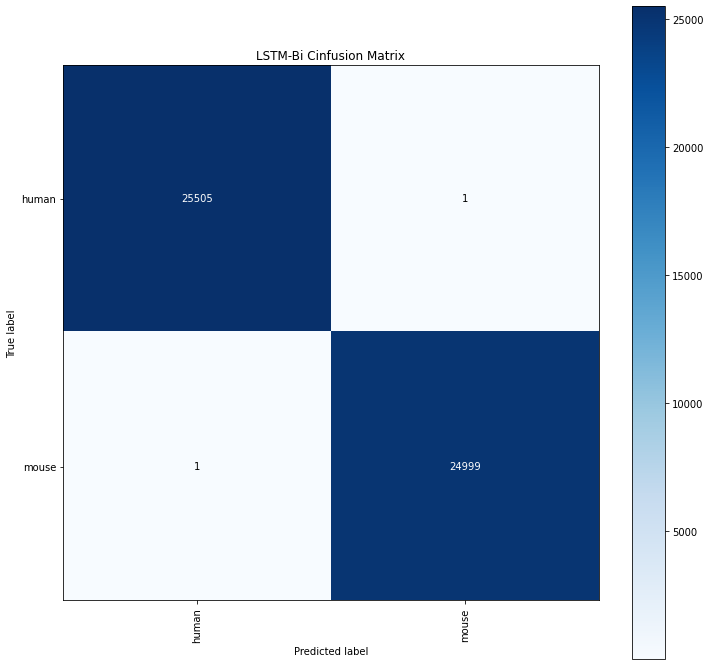

In [10]:
skplt.metrics.plot_confusion_matrix(
    y_true_classes,
    y_pred_classes_lstm,
    title="LSTM-Bi Cinfusion Matrix",
    figsize=(12,12),x_tick_rotation=90)

<AxesSubplot:title={'center':'CNN Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

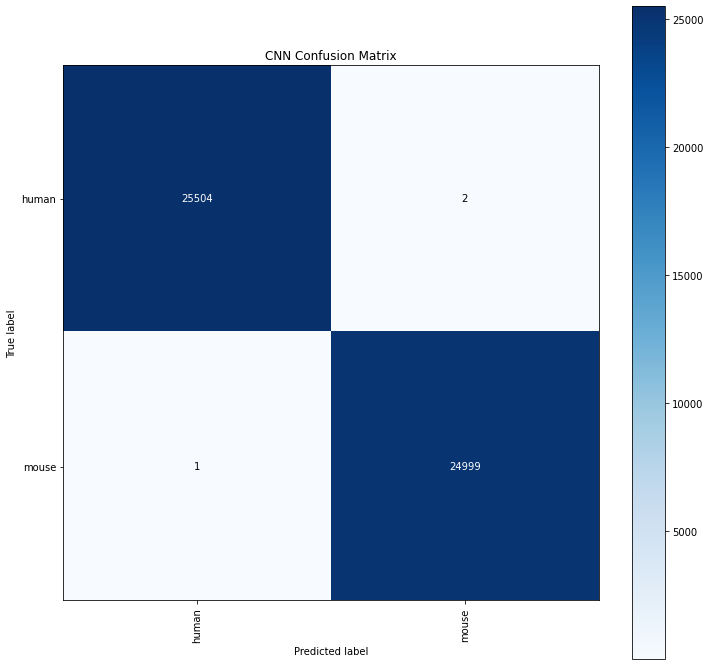

In [11]:
skplt.metrics.plot_confusion_matrix(
    y_true_classes,
    y_pred_classes_cnn,
    title="CNN Confusion Matrix",
    figsize=(12,12),x_tick_rotation=90)